In [1]:
import os

# Çalışma dizinini tangible klasörüne ayarla
os.chdir('..')

# Şu anki çalışma dizinini kontrol et
print(os.getcwd())


c:\Users\musta\Documents\Python Projects\tangible


In [2]:
import pandas as pd
from src.data_loader import load_data, load_data_with_delimiter

# Veriyi yükle
aof_df = load_data_with_delimiter('data/aof_data_ge.csv', delimiter=';')
# 'PROGRAM' sütunundaki boşlukları silme
aof_df['PROGRAM'] = aof_df['PROGRAM'].str.strip()
#aof_df.head()

# ORAN değerini kategorilere ayırma
bins = [0, 34, 59, 79, 100]
labels = ['%0-34', '%35-59', '%60-79', '%80-100']
aof_df['ORAN_Kategori'] = pd.cut(aof_df['ORAN'], bins=bins, labels=labels, right=True)
#print(aof_df.head())

# Her bir PROGRAM için AKTİF ve PASİF durumlarına göre frekans verisini oluşturma
frequency_df = aof_df.groupby(['PROGRAM', 'DURUM']).size().reset_index(name='f')
#frequency_df.head()

# DURUM'a göre toplam öğrenci sayısını hesaplama
total_students = aof_df.groupby('DURUM').size().reset_index(name='Toplam Öğrenci Sayısı')

# (Program bazında) Frekans verisini gruplandırma
frequency_df = aof_df.groupby(['PROGRAM', 'ORAN_Kategori', 'DURUM'], observed=False).size().reset_index(name='f')
frequency_df.head(5)

# (Oran) bazında) Pivot tablo olarak oluşturma
pivot_table_categorical = frequency_df.pivot_table(index='DURUM', columns=['ORAN_Kategori'], observed=False, values='f', aggfunc='sum', fill_value=0)
#pivot_table_categorical.head()
# (Program ve Oran) bazında) Pivot tablo olarak oluşturma
#pivot_table_pct = frequency_df.pivot_table(index='PROGRAM', columns=['ORAN_Kategori', 'DURUM'], values='f', fill_value=0)
# Tabloyu düzenleme
#pivot_table_pct = pivot_table_pct.reindex(columns=pd.MultiIndex.from_product([labels, ['AKTİF', 'PASİF']]), fill_value=0)
#pivot_table_pct = pivot_table_pct.reset_index()
#pivot_table_pct.head()


c:\Users\musta\Documents\Python Projects\tangible\src\visualization.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, y=column_name, hue=hue, palette=palette, order=order, hue_order=hue_order)


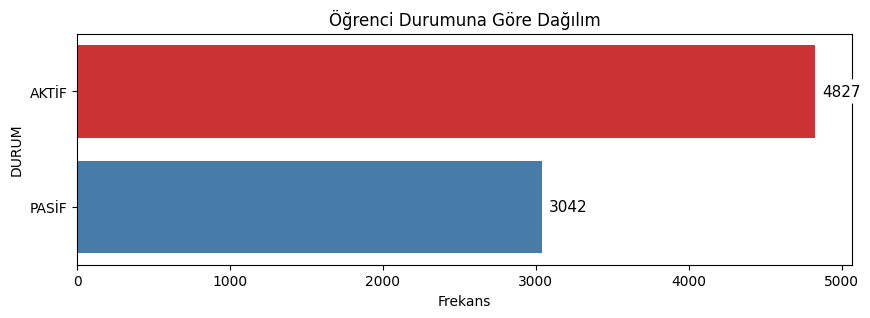

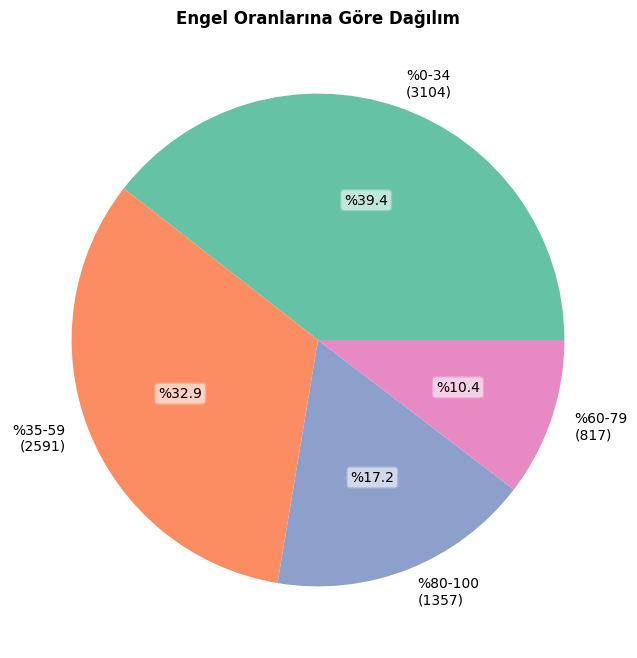

In [3]:
from src.visualization import plot_categorical_distribution, plot_crosstab, plot_scatter, plot_frequency_heatmap, plot_frequency_bar, plot_pie_chart
import matplotlib.pyplot as plt
import seaborn as sns

# Kategorik dağılımlar
# DURUM bazında dağılım
plot_categorical_distribution(aof_df, column_name='DURUM', title='Öğrenci Durumuna Göre Dağılım')
#plot_pie_chart(aof_df, column_name='DURUM', title='Öğrenci Durumuna Göre Dağılım', labels_with_count=True, autopct_text=True)
# Program bazında dağılım
#plot_categorical_distribution(aof_df, column_name='PROGRAM', title='Pragrama Göre Dağılım', column_order='descending')
#plot_categorical_distribution(aof_df, column_name='PROGRAM', hue='DURUM', title='Pragrama Göre Dağılım', column_order='descending')
# Oran bazında dağılım
#plot_categorical_distribution(aof_df, column_name='Engel Oranlarına Göre Dağılım', title='Engel Oranı Dağılımı')
plot_pie_chart(aof_df, column_name='ORAN_Kategori', title='Engel Oranlarına Göre Dağılım', labels_with_count=True, autopct_text=True)
#plot_scatter(aof_df, col1='ORAN_Kategori', col2='DURUM')
#plot_frequency_bar(frequency_df, col1='ORAN_Kategori')
#plot_frequency_heatmap(pivot_table_categorical)
# Oran ve Durum bazında dağılım
#plot_categorical_distribution(aof_df, column_name='ORAN_Kategori', hue='DURUM', title='Öğrenci Durumuna göre Engel Oranı Dağılımı')


c:\Users\musta\Documents\Python Projects\tangible\src\visualization_aof.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='f', y='PROGRAM', hue='DURUM', data=df, orient='h', dodge=True, width=0.9, ci=None)


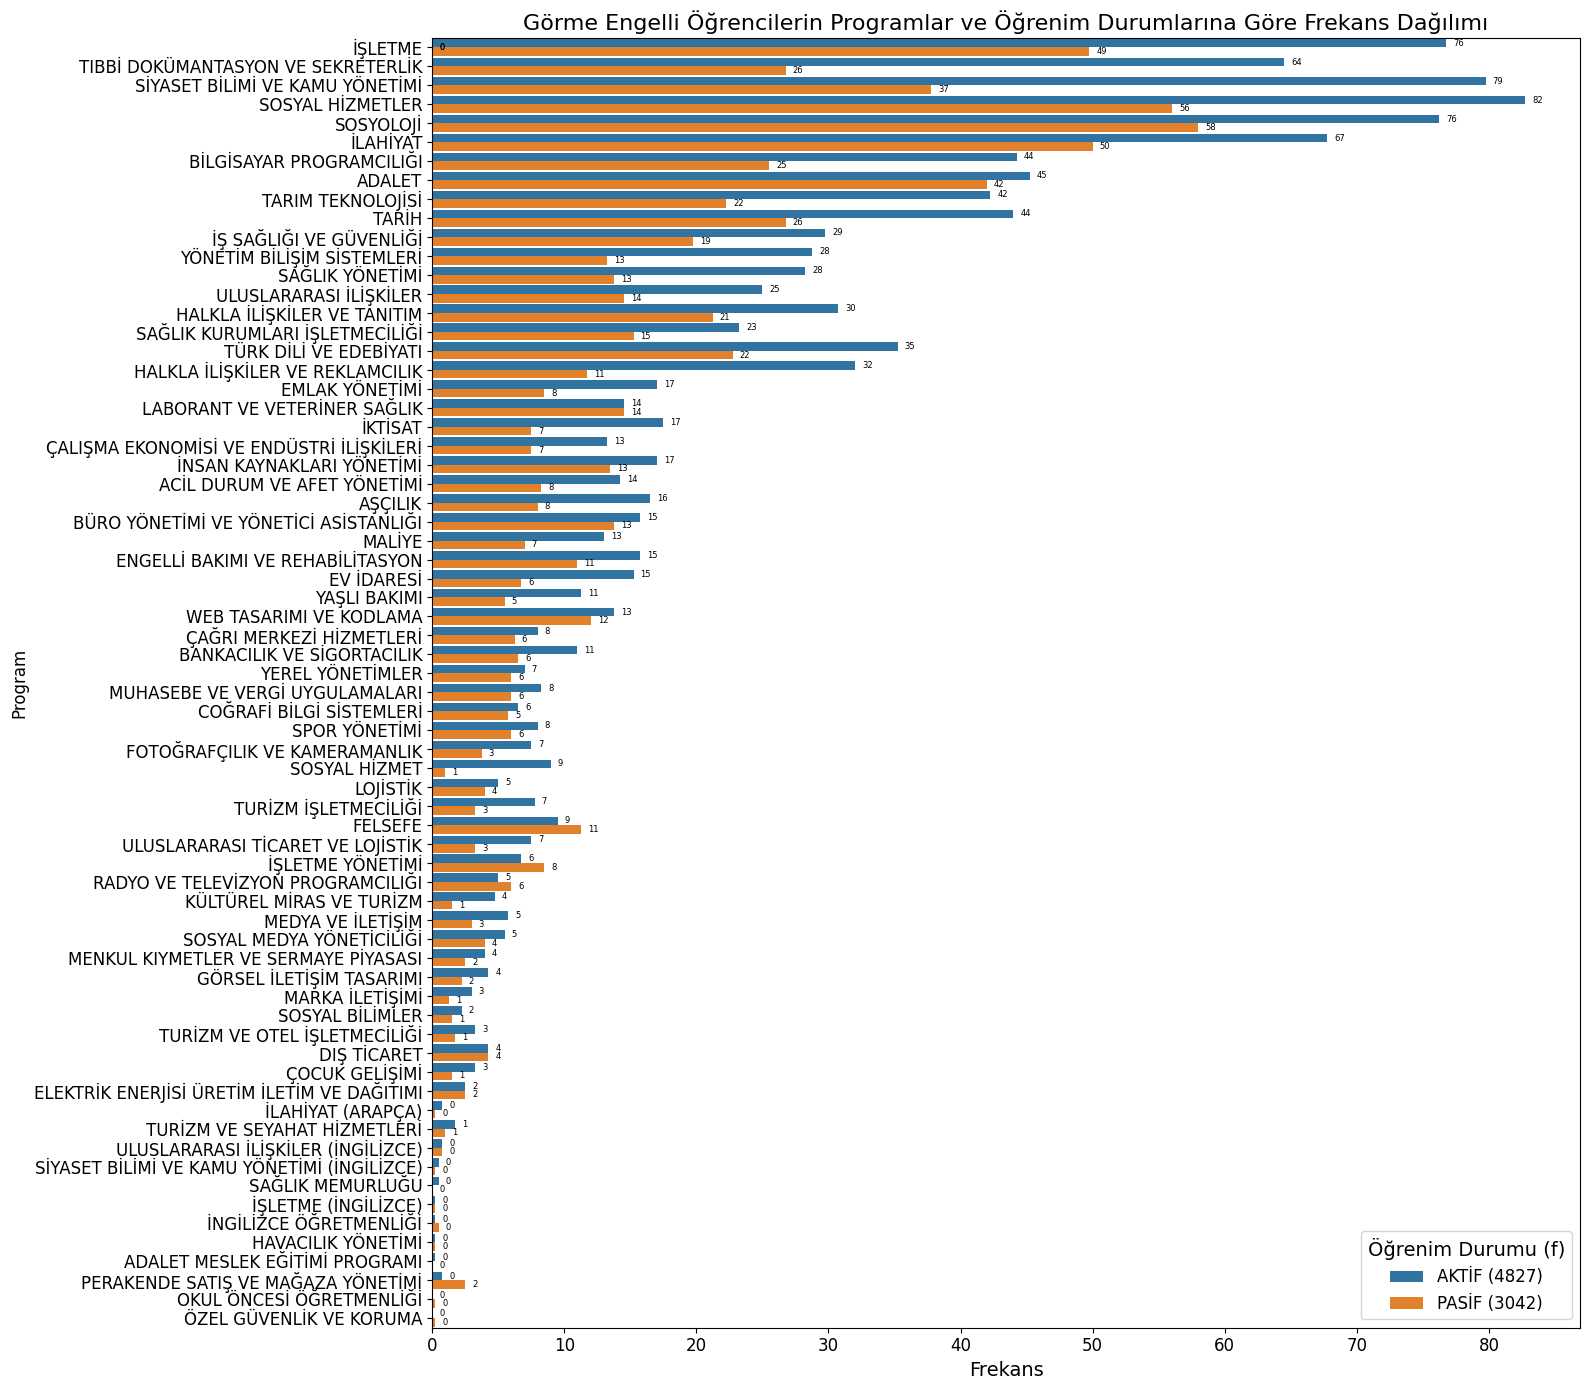

In [4]:
#import matplotlib.pyplot as plt
#import seaborn as sns
#import pandas as pd
# Visualization
#from src.visualization import plot_categorical_distribution, plot_numerical_distribution, plot_crosstab, plot_scatter, plot_frequency_bar, plot_frequency_heatmap
from src.visualization_aof import create_frequency_bar_for_aof

# DURUM='AKTİF' ve 'PASİF' olanları filtreleme
#filtered_df = frequency_df[frequency_df['DURUM'].isin(['AKTİF', 'PASİF'])]

# Veriyi ORAN, DURUM ve PROGRAM'a göre gruplama
#grouped = filtered_df.groupby(['PROGRAM', 'DURUM']).sum().reset_index()

# AKTİF olanları filtreleme ve frekans değerine göre azalan şekilde sıralama
aktif_df = frequency_df[frequency_df['DURUM'] == 'AKTİF'].sort_values(by='f', ascending=False)
pasif_df = frequency_df[frequency_df['DURUM'] == 'PASİF']

# AKTİF sıralamasını koruyarak PASİF durumlarını aynı sırada göstermek
sorted_df = pd.concat([aktif_df, pasif_df])
sorted_df['PROGRAM'] = pd.Categorical(sorted_df['PROGRAM'], categories=aktif_df['PROGRAM'].unique(), ordered=True)

create_frequency_bar_for_aof(sorted_df, total_students)

In [5]:
# Results Klasörü'ne Kaydetme
# CSV olarak kaydetme
#grouped_df.to_csv('results/theme1.csv', index=False)

# Excel olarak kaydetme
#grouped_df.to_excel('results/theme1.xlsx', index=False)

# Frequency
# CSV olarak kaydetme
#frequency_df.to_csv('results/frequency_analysis.csv', index=False)

# Excel olarak kaydetme
#frequency_df.to_excel('results/frequency_analysis.xlsx', index=False)

# MultiIndex'i düzleştir ve sütunları birleştir
#pivot_table_percentage.columns = ['_'.join(col).strip() for col in pivot_table.columns.values]
# Tabloyu Excel olarak kaydet
#output_path = 'results/frequency_program.xlsx'
#pivot_table_percentage.to_excel(output_path, index=False)
#print(f"Tablo, '{output_path}' dosyasına başarıyla kaydedildi.")
